In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_WR.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_avg_depth_of_target', 'weighted_avg_avoided_tackles',
       'weighted_avg_caught_percent', 'weighted_avg_contested_catch_rate',
       'weighted_avg_contested_receptions', 'weighted_avg_contested_targets',
       'weighted_avg_declined_penalties', 'weighted_avg_drop_rate',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_fumbles',
       'weighted_avg_grades_hands_drop', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_route',
       'weighted_avg_inline_rate', 'weighted_avg_interceptions',
       'weighted_avg_longest', 'weighted_avg_pass_block_rate',
       'weighted_avg_pass_blocks', 'weighted_avg_pass_plays',
       'weighted_avg_penalties', 'weighted

In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [5]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       WR         5.419766        331.370639         17.0   
50   49ers  2020       WR         4.631685        605.449663         24.0   
70   49ers  2021       WR         4.416438        315.748468         18.0   
123  49ers  2022       WR         6.700288        253.620355         26.0   
12   Bears  2019       WR        15.531350        186.577541         20.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         24.0     63.513776    69.554946     27.90%  ...   
50         18.0     69.554946    71.292028      5.40%  ...   
70         26.0     71.292028    74.381042     19.50%  ...   
123        26.0     74.381042    73.373080     27.60%  ...   
12         22.0     67.241234    67.376749     -2.10%  ...   

     Previous_slot_rate  Previous_targeted_qb_rating  Previous_targets  \
17            36.339349                    92.858737         42.852679   
50            35

In [6]:
team_data = df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001DB9FD0B310>>


In [7]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_targeted_qb_rating','Current_AV', 'weighted_avg_caught_percent',
                                         'weighted_avg_touchdowns', 'weighted_avg_yprr', 'weighted_avg_yards_after_catch', 
                                         'Value_cap_space',]]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['win-loss-pct']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [8]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[ 94.33939394  24.          64.37815895   3.40194397   1.54209262
   221.24413951   5.41976621]
  [ 91.05386064  18.          66.70056497   2.29190207   1.53842436
   226.54111739   4.63168517]
  [107.22136808  26.          64.79687296   4.36221498   1.8937785
   389.06058632   4.41643836]]

 [[ 85.88213387  22.          61.99375944   3.64116759   1.33092602
   170.07800705  15.53134963]
  [ 86.65986985  25.          65.4962039    3.76626898   1.39550434
   225.51789588  12.47729566]
  [ 71.12708221  20.          60.16061257   2.04298764   1.27338528
   196.72810317  11.41917808]]

 [[ 72.48576372  19.          55.9954523    2.29065744   1.45240237
   225.59218982   6.89691817]
  [ 83.59354043  21.          60.96331361   3.21893491   1.41608974
   203.85946746  15.58526741]
  [107.73947368  31.          67.7755934    7.16873065   1.95020124
   401.31011352  10.85479452]]

 [[ 90.04700489  20.          61.1542176    4.15525672   1.5080868
   220.79278729   9.84590861]
  [114.54349236 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 3.1292 - val_loss: 0.4495
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7960 - val_loss: 0.1094
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4212 - val_loss: 0.4970
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5883 - val_loss: 0.4026
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3277 - val_loss: 0.1570


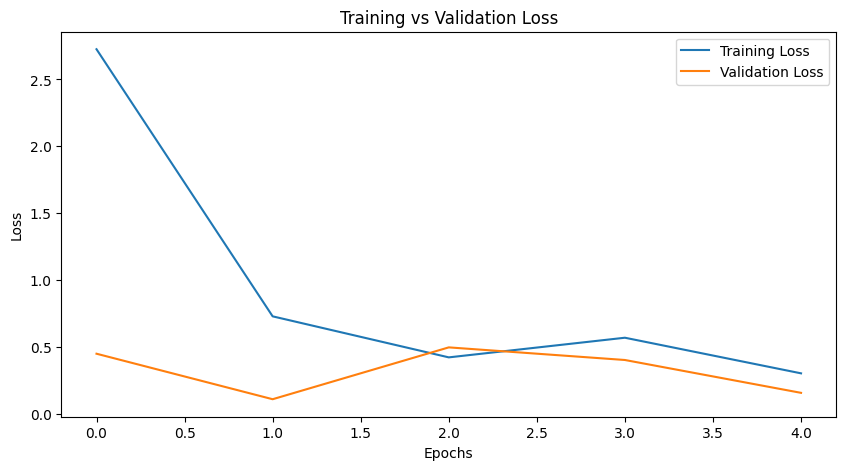

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
R² Score: -3.6691


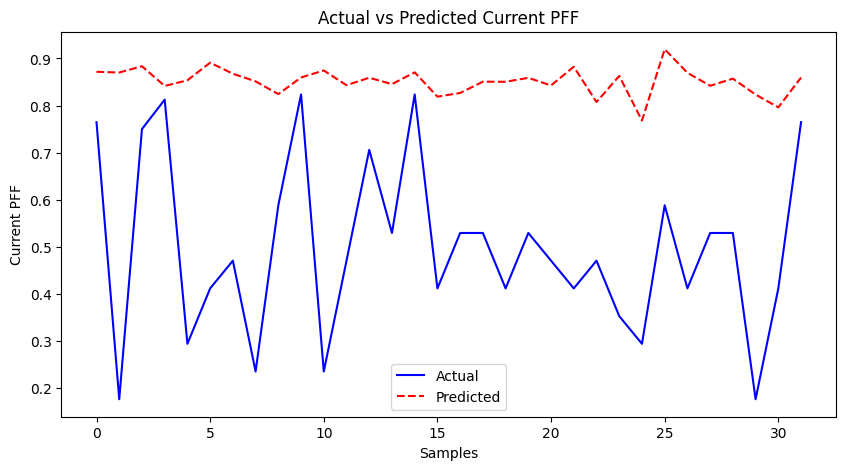

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3645 - val_loss: 0.0282
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0636 - val_loss: 0.0506
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1379 - val_loss: 0.1101
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2211 - val_loss: 0.1231
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2529 - val_loss: 0.0510
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1452 - val_loss: 0.0208
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0913 - val_loss: 0.0301
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1469 - val_loss: 0.0490
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1445 - val_loss: 0.0395
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1743 - val_loss: 0.0329


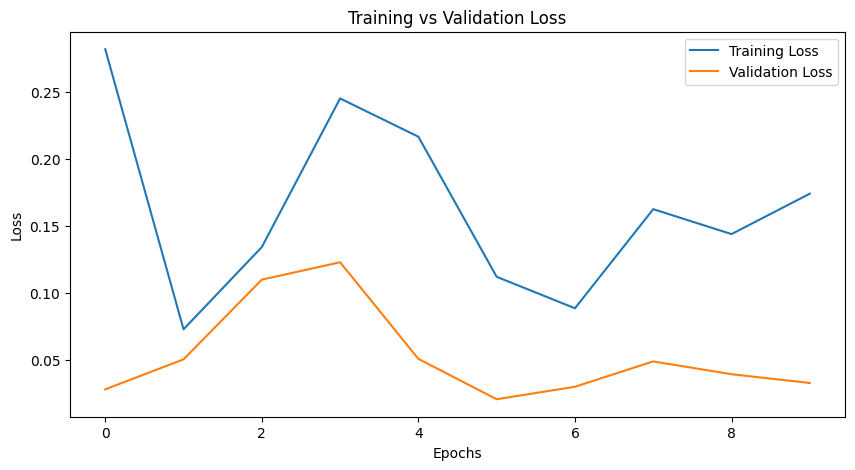

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: -0.1693


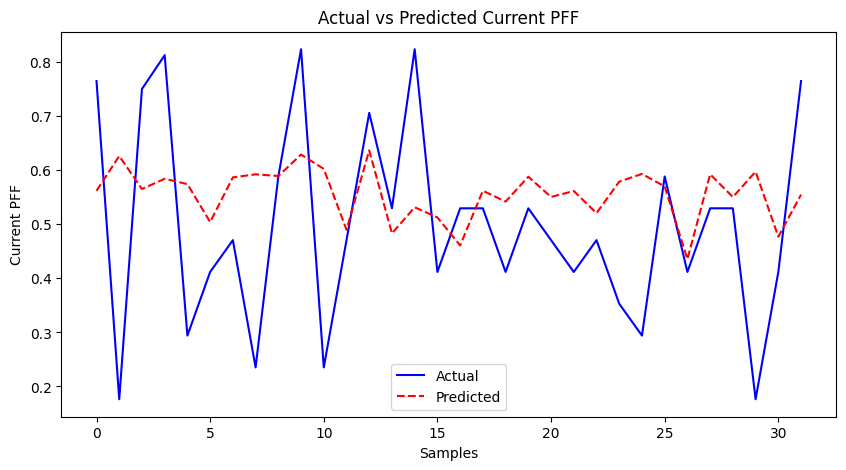

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1284 - val_loss: 0.0357
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1022 - val_loss: 0.0387
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0568 - val_loss: 0.0375
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1644 - val_loss: 0.0312
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0904 - val_loss: 0.0331
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0704 - val_loss: 0.0334
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0757 - val_loss: 0.0277
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0867 - val_loss: 0.0235
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1312 - val_loss: 0.0281
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0599 - val_loss: 0.0274
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0752 - val_loss: 0.0260
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0613 - val_loss: 0.0276
E

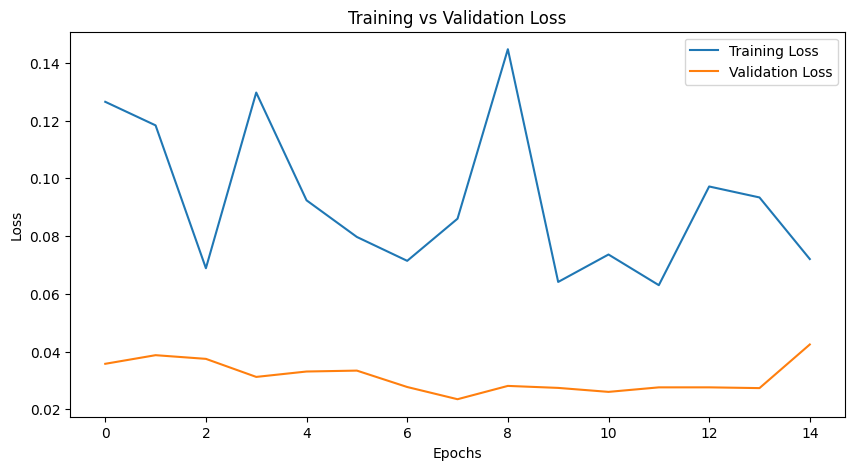

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
R² Score: -0.4228


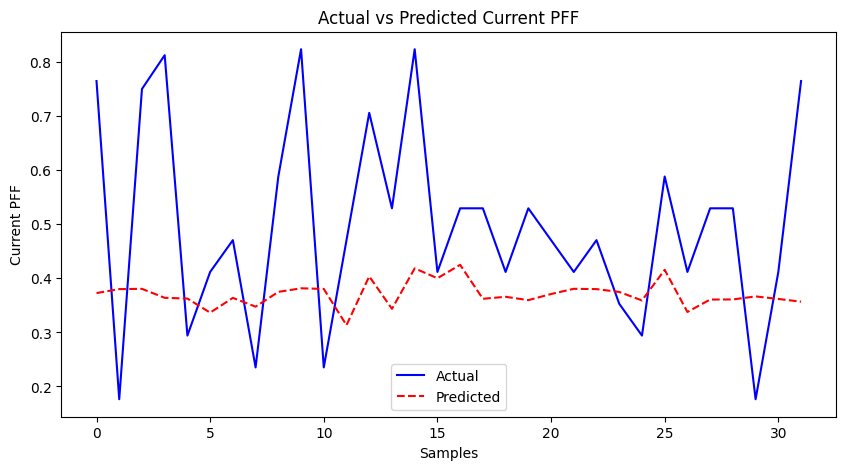

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1903 - val_loss: 0.0286
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0527 - val_loss: 0.0237
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0427 - val_loss: 0.0239
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0671 - val_loss: 0.0306
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0955 - val_loss: 0.0391
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0727 - val_loss: 0.0293
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0593 - val_loss: 0.0444
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0767 - val_loss: 0.0345
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0864 - val_loss: 0.0255
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0692 - val_loss: 0.0304
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0492 - val_loss: 0.0233
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1068 - val_loss: 0.0437
E

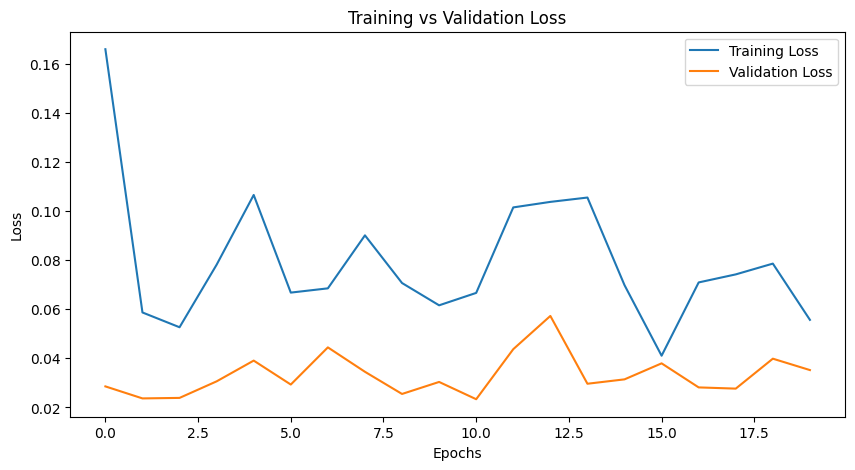

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² Score: -0.1243


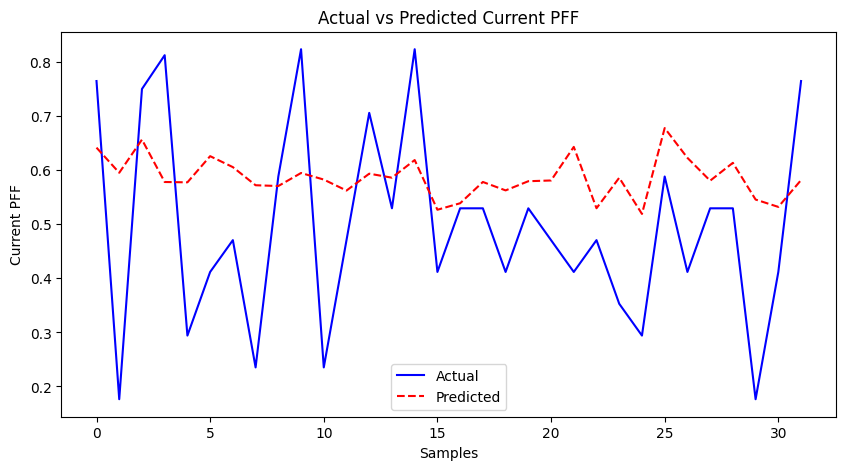

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0642 - val_loss: 0.0258
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0727 - val_loss: 0.0340
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0507 - val_loss: 0.0263
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0624 - val_loss: 0.0275
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0647 - val_loss: 0.0380
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0559 - val_loss: 0.0321
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0330 - val_loss: 0.0254
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0436 - val_loss: 0.0317
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0529 - val_loss: 0.0332
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0464 - val_loss: 0.0274
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0425 - val_loss: 0.0312
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0521 - val_loss: 0.0342
Ep

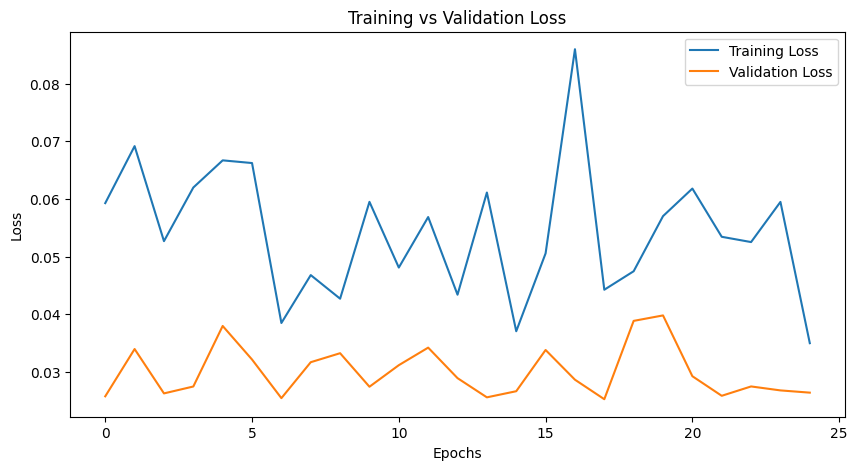

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
R² Score: 0.0422


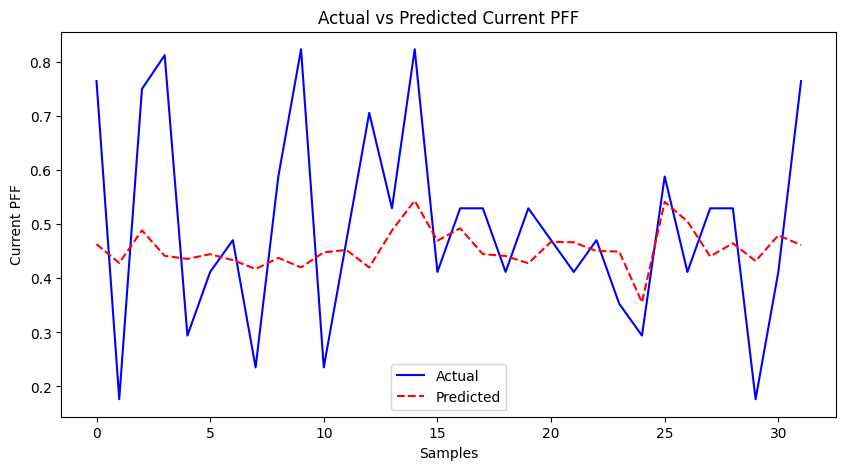

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0609 - val_loss: 0.0264
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0265 - val_loss: 0.0268
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0510 - val_loss: 0.0244
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0385 - val_loss: 0.0249
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0450 - val_loss: 0.0249
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0350 - val_loss: 0.0247
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0404 - val_loss: 0.0260
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0331 - val_loss: 0.0267
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0403 - val_loss: 0.0268
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0365 - val_loss: 0.0281
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0298 - val_loss: 0.0298
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0364 - val_loss: 0.0312
E

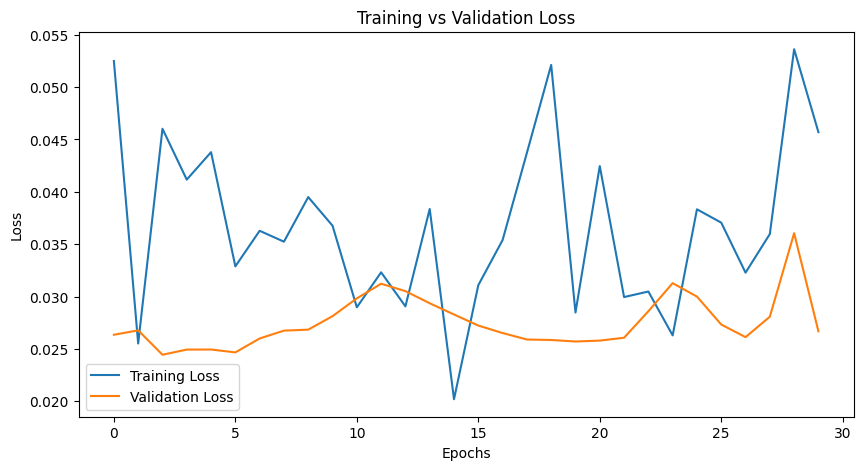

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² Score: 0.2029


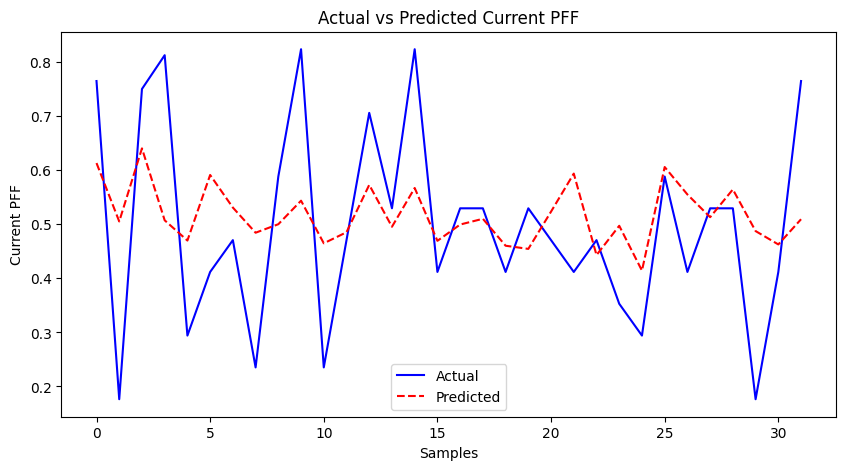

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0546 - val_loss: 0.0256
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0327 - val_loss: 0.0252
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0557 - val_loss: 0.0267
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0388 - val_loss: 0.0242
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0357 - val_loss: 0.0276
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0494 - val_loss: 0.0260
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0307 - val_loss: 0.0274
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0249 - val_loss: 0.0288
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0303 - val_loss: 0.0309
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - val_loss: 0.0340
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0413 - val_loss: 0.0308
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0302 - val_loss: 0.0282
E

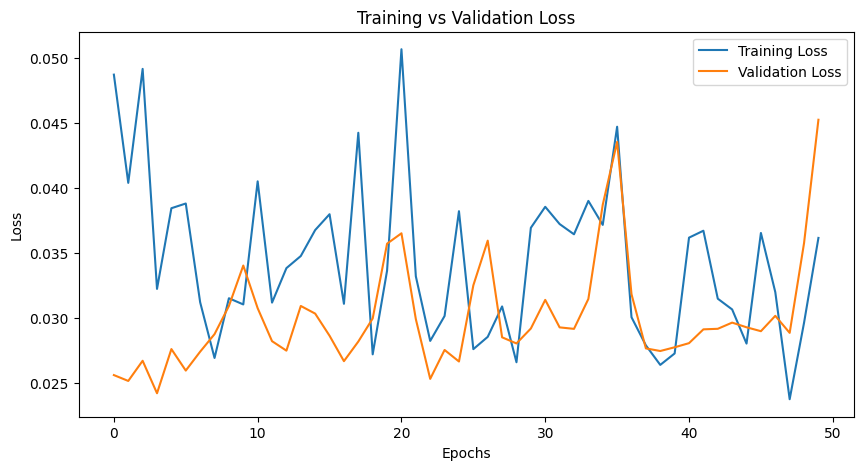

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
R² Score: -0.0236


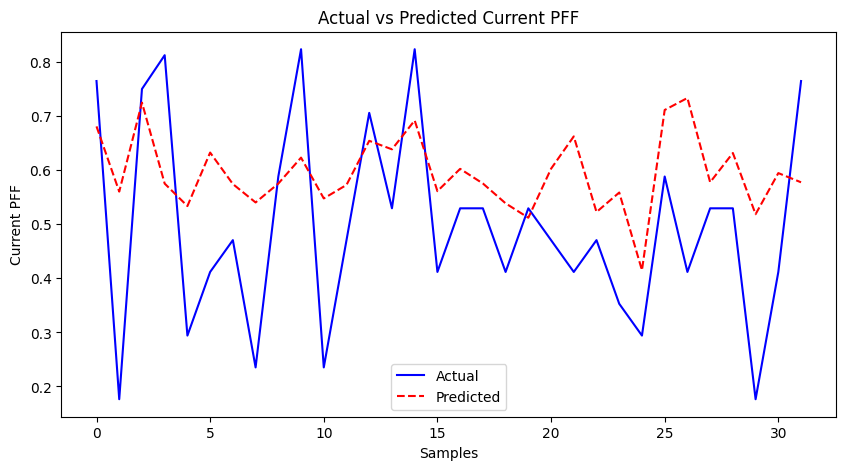

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0549 - val_loss: 0.0343
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0275 - val_loss: 0.0288
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0500 - val_loss: 0.0307
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0279 - val_loss: 0.0289
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0328 - val_loss: 0.0289
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0181 - val_loss: 0.0310
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0369 - val_loss: 0.0309
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0243 - val_loss: 0.0293
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0468 - val_loss: 0.0293
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0315 - val_loss: 0.0291
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0227 - val_loss: 0.0308
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0407 - val_lo

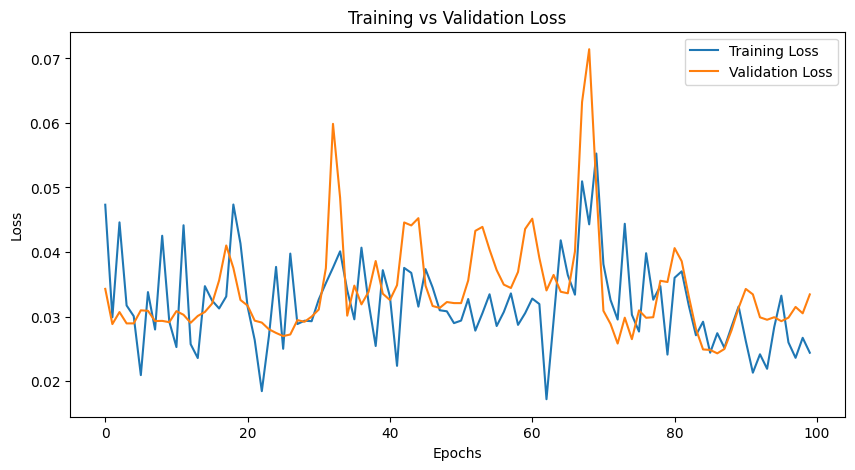

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² Score: 0.2539


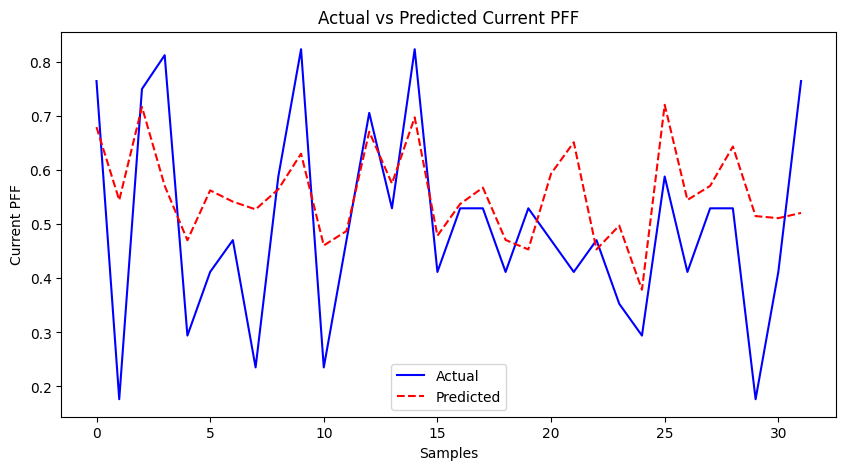

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0344 - val_loss: 0.0266
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0364 - val_loss: 0.0251
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.0254
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0272 - val_loss: 0.0248
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0194 - val_loss: 0.0281
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0286
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0416 - val_loss: 0.0249
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0225 - val_loss: 0.0246
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0272 - val_loss: 0.0257
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0361 - val_loss: 0.0235
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0380 - val_loss: 0.0258
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0302 - val_lo

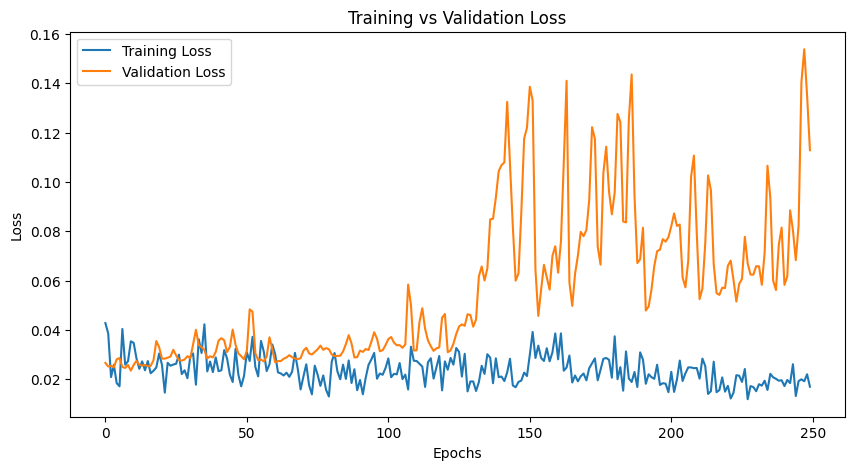

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: 0.0212


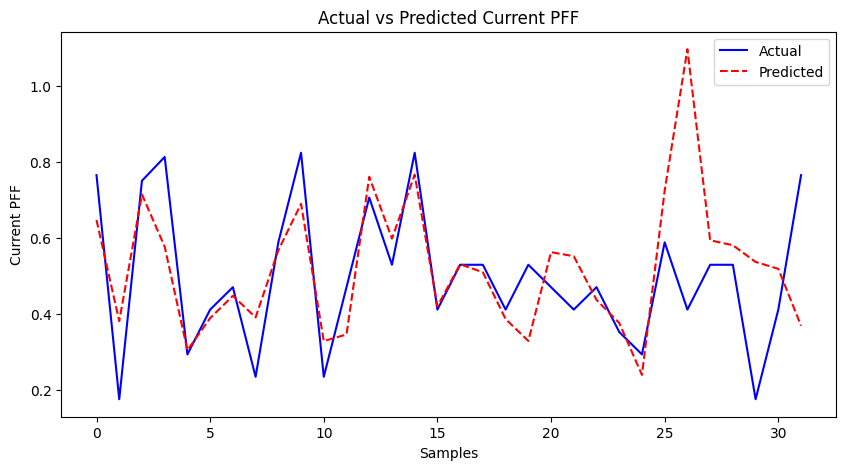

In [13]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()